In [1]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms


hyperparams = {
    "batch_size": 4,
    "learning_rate": 0.0001,
    "epochs": 5,
    "transform": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224), # 입력 이미지보다 약간 더 큰 이미지 크기로 변경 한 뒤, 이미지 테두리 부분을 잘라내는 기법 : 객체 특징 유지
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.48235, 0.45882, 0.40784],
                std=[1.0/255.0, 1.0/255.0, 1.0/255.0]
            )
        ]
    )
}

train_dataset = ImageFolder("../datasets/pet/train", transform=hyperparams["transform"])
test_dataset = ImageFolder("../datasets/pet/test", transform=hyperparams["transform"])

train_dataloader = DataLoader(train_dataset, batch_size=hyperparams["batch_size"], shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=hyperparams["batch_size"], shuffle=True, drop_last=True)

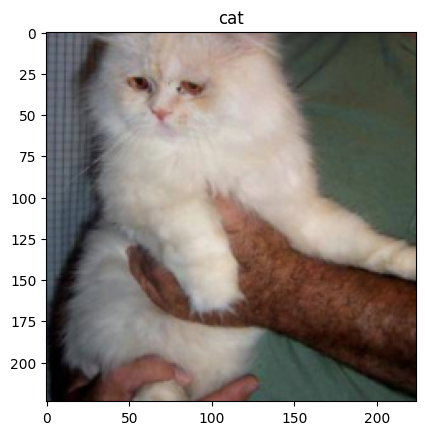

In [2]:
import numpy as np
from matplotlib import pyplot as plt

mean=[0.48235, 0.45882, 0.40784]
std=[1.0/255.0, 1.0/255.0, 1.0/255.0]

images, labels = next(iter(train_dataloader))
for image, label in zip(images, labels):
    image = image.numpy().transpose((1, 2, 0))
    image = ((std * image + mean) * 255).astype(np.uint8)

    plt.imshow(image)
    plt.title(train_dataset.classes[int(label)])
    plt.show()
    break